466


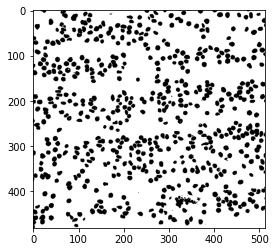

In [100]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


img = cv.imread(r"C:\Users\rieke\Desktop\bloodsmears\Image_0054.jpeg");

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
mask = cv.inRange(gray,60,150)

th = hsv[:,:,2]
plt.imshow(gray, cmap="gray")
rety, threshy = cv.threshold(gray, 0,255, cv.THRESH_BINARY+ cv.THRESH_OTSU)

contoury, hierarchyy = cv.findContours(threshy,
                                       cv.RETR_LIST,
                                       cv.CHAIN_APPROX_NONE)
county = 0
for cony in contoury:
    if(cv.contourArea(cony)>20):
        img_contoury = cv.drawContours(img, cony, -1, (255, 0, 255), 2)
        county= county+1
print(county)
mask = cv.inRange(gray,60,150)
plt.imshow(threshy, cmap="gray")

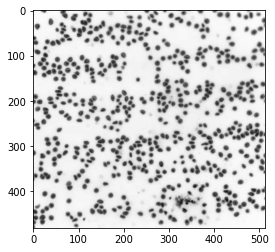

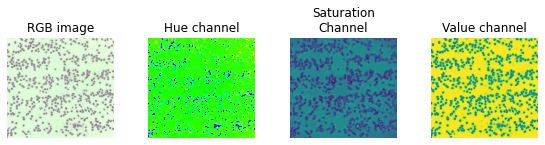

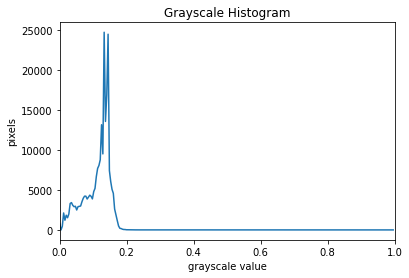

0.9827467483190038


In [101]:
import skimage.io
import skimage.color
import skimage.filters

image = skimage.io.imread(r"C:\Users\rieke\Desktop\bloodsmears\Image_0054.jpeg")
# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)
hsv_image = skimage.color.rgb2hsv(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")
plt.show()

# create a histogram of the blurred grayscale image
hue_img = hsv_image[:, :, 0]
sat_img = hsv_image[:, :, 1]
value_img = hsv_image[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 2))
ax0.imshow(image)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(sat_img)
ax2.set_title('Saturation\nChannel')
ax2.axis('off')
ax3.imshow(value_img)
ax3.set_title("Value channel")
ax3.axis('off')
fig.tight_layout()
histogram, bin_edges = np.histogram(sat_img, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

max_val = np.max(blurred_image)
print(max_val)


0.7796875000000001


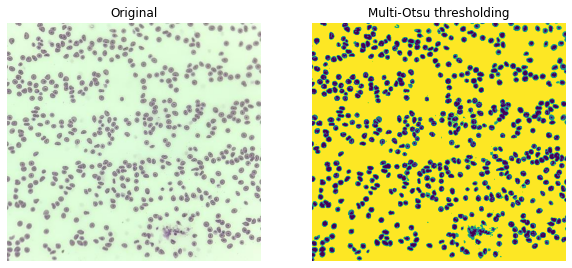

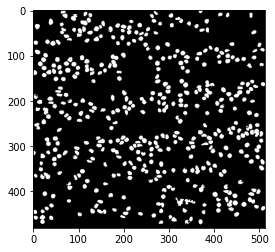

413
413


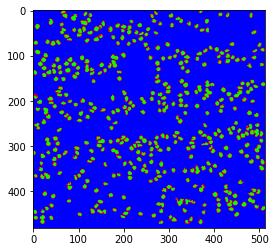

In [103]:
t = skimage.filters.threshold_otsu(value_img)
print(t)

thresholds = skimage.filters.threshold_multiotsu(gray_image, classes=3)
regions = np.digitize(gray_image, bins=thresholds)


fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(regions)
ax[1].set_title('Multi-Otsu thresholding')
ax[1].axis('off')
plt.show()

binary_mask = gray_image < thresholds[0]
binary_mask = skimage.morphology.remove_small_objects(binary_mask, 50)
binary_mask = skimage.morphology.remove_small_holes(binary_mask, 50)
fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")
plt.show()
from skimage import img_as_ubyte
save =  img_as_ubyte(image)
cv_image = img_as_ubyte(binary_mask)
import imutils

contours, hierarchies = cv.findContours(cv_image, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))



count = 0
for contour in contours:
    if(cv.contourArea(contour) < 10):
        continue
    else:
        cv.drawContours(cv_image, contour, 2, (0,255,0), 2)
        count = count + 1

print(count)
plt.imshow(cv_image, cmap="brg")
